# EN3160 Assignment 1 

#### Name : Odil Janandith8
#### Index No : 210234H


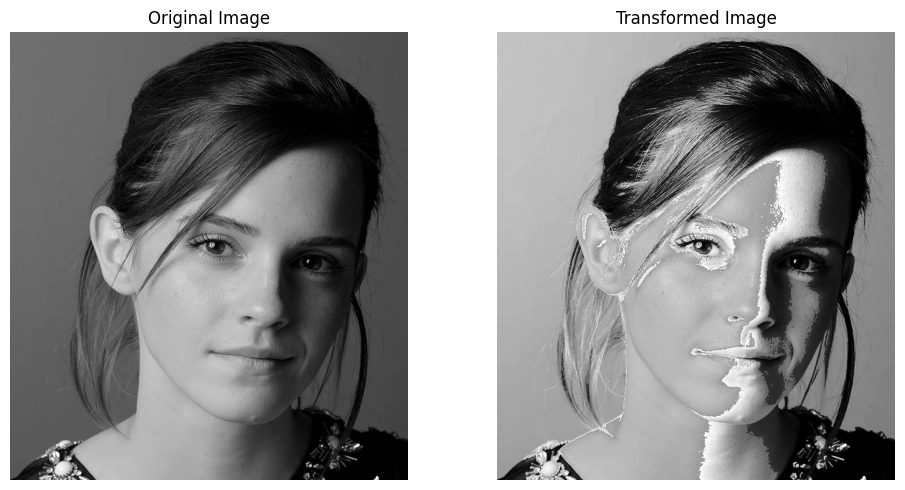

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def intensity_T(pix):
    if 50 <= pix <= 150:
        T_pix = 1.55 * pix + 22.5 #curve
        return T_pix
    else:
        return pix
    
def intensity_T_img(img: np.ndarray) -> np.ndarray: #type conversion added %TODO
    new_img = np.zeros(img.shape, dtype=np.uint8)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i][j]
            new_img[i][j] = intensity_T(pixel)  # Calling the intesnity tranformation
    
    return new_img



# Load the image in grayscale mode
emma_img = cv2.imread("imgs/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the intensity transformation
emma_T_img = intensity_T_img(emma_img)

# Plot the original and transformed images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(emma_img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(emma_T_img, cmap='gray')
plt.title("Transformed Img")
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()
